In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import pandas as pd
url = 'data/nhanes_2015_2016.csv'
da = pd.read_csv(url)

In [3]:
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


# studying discrete values

In [7]:
gender = da['RIAGENDR']
gender.value_counts()

RIAGENDR
2    2976
1    2759
Name: count, dtype: int64

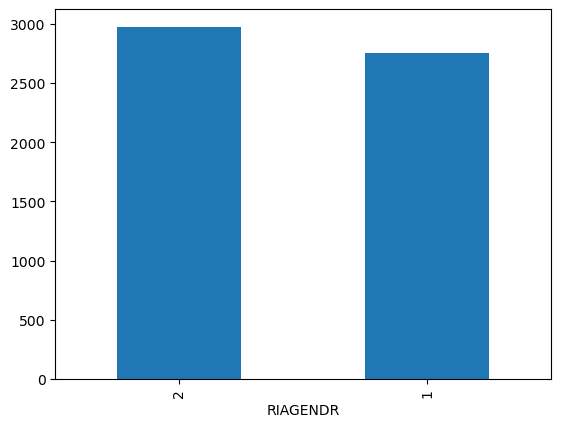

In [9]:
gender.value_counts().plot(kind='bar')
plt.show()

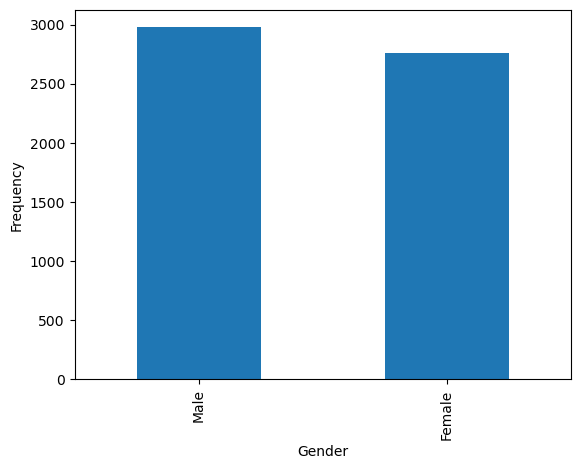

In [11]:
gender.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [12]:
sizes = np.array([22, 23, 29, 32, 39, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 46, 51, 51, 55, 57, 58, 61, 64, 97, 99])
sizes.mean()

np.float64(48.28)

In [20]:
from collections import Counter
cnt = Counter()
for size in sizes:
    cnt[size] += 1

cnt.most_common()         # index 0 is the most common i.e the node

[(np.int64(42), 8),
 (np.int64(51), 2),
 (np.int64(22), 1),
 (np.int64(23), 1),
 (np.int64(29), 1),
 (np.int64(32), 1),
 (np.int64(39), 1),
 (np.int64(43), 1),
 (np.int64(44), 1),
 (np.int64(46), 1),
 (np.int64(55), 1),
 (np.int64(57), 1),
 (np.int64(58), 1),
 (np.int64(61), 1),
 (np.int64(64), 1),
 (np.int64(97), 1),
 (np.int64(99), 1)]

Alternative method: use the scipy library

In [21]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 2.5 MB/s  0:00:14 eta 0:00:010:01:02


In [23]:
from scipy import stats
stats.mode(sizes)                  # index 0 has value, index 1 has count

ModeResult(mode=np.int64(42), count=np.int64(8))

In [25]:
# there's also mode fnx in pandas lib
gender.mode()             # not too useful since we could have got that from bar chart anyway

0    2
Name: RIAGENDR, dtype: int64

In [26]:
stats.mode(gender)        # from scipy stats lib

ModeResult(mode=np.int64(2), count=np.int64(2976))

# More than one 'classes'

In [28]:
da['HIQ210'].unique()

array([ 2., nan,  1.,  9.])

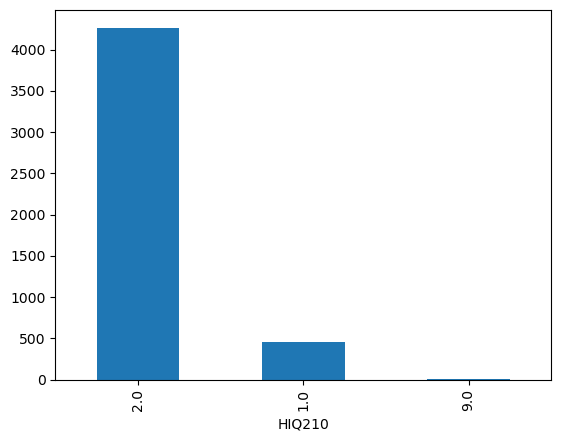

In [33]:
# should use labels, do it in future
da['HIQ210'].value_counts().plot(kind='bar')
plt.show()

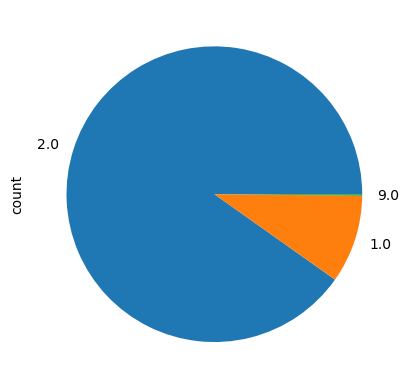

In [34]:
# should use labels, do it in future
da['HIQ210'].value_counts().plot(kind='pie')        # highly not recommmended
plt.show()

# Studying real number values

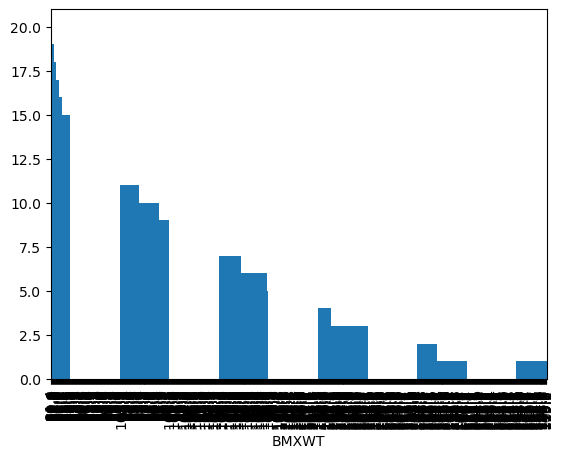

In [37]:
wt = da['BMXWT']
wt.value_counts().plot(kind='bar')
plt.show()

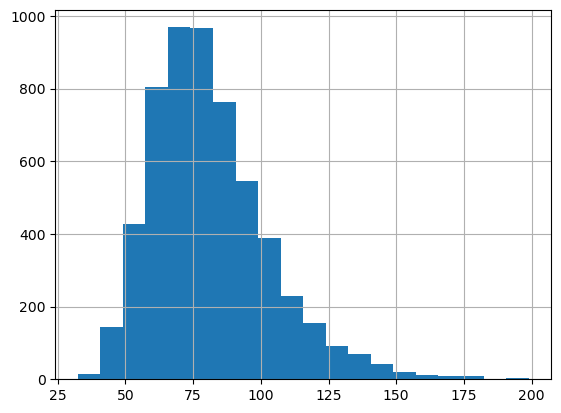

In [41]:
wt.hist(bins=20)
plt.show()

# Custom matplotlib histogram

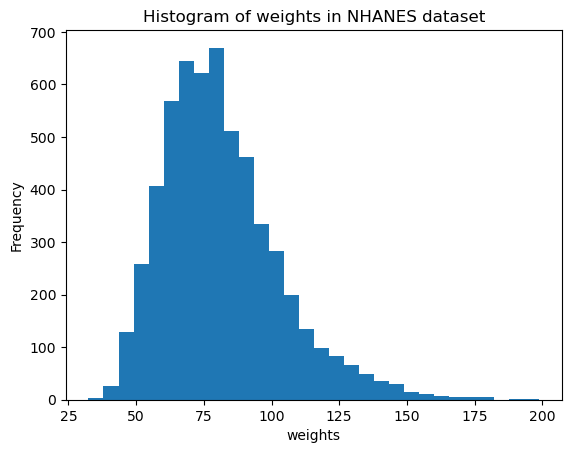

In [42]:
plt.hist(wt, bins=30)
plt.ylabel('Frequency')
plt.xlabel('weights')
plt.title('Histogram of weights in NHANES dataset')
plt.show()

In [43]:
# Prettifying and styling matplotlib with seaborn

In [44]:
!pip install seaborn

In [46]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')

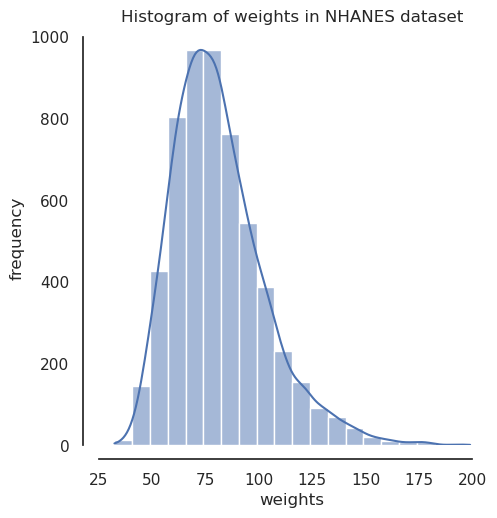

In [54]:
sns.displot(wt, bins=20, kde=True)       # kde=False      # to get rid of the trend line
plt.xlabel('weights')
plt.ylabel('frequency')
plt.title('Histogram of weights in NHANES dataset')
sns.despine(offset=10, trim=True)            # move axes away
plt.show()